In [25]:
from cell.word2vec_training_data import *
from cell.word2vec_model import *
from sklearn.decomposition import PCA
from sklearn import preprocessing
from cell import  utils, analysis, plot_utils

In [32]:
import imp
import os
from cell import plot_utils, graph_utils, analysis, utils, math_utils, word2vec_utils

imp.reload(plot_utils)
imp.reload(graph_utils)
imp.reload(analysis)
imp.reload(utils)
imp.reload(math_utils)


<module 'cell.math_utils' from '/Users/fahimehb/Documents/git-workspace/celltypes/cell/math_utils.py'>

In [13]:
#tokens = tokenize(doc)
tokens = utils.read_list_of_lists_from_csv("/Users/fahimehb/Documents/NPP_GNN_project/dat/walks/VISp/test_layer/Undirected_Weighted_node2vec/N_1_l_1000000_p_1_q_1/test_layer/", "walk_1000000.csv")
tokens = tokens[0]
word_to_id, id_to_word = mapping(tokens)
X, Y = generate_training_data(tokens, word_to_id, 2)
vocab_size = len(id_to_word)
m = Y.shape[1]
# turn Y into one hot encoding
Y_one_hot = np.zeros((vocab_size, m))
Y_one_hot[Y.flatten(), np.arange(m)] = 1

In [26]:
layer = "test_layer"
walk_type = "Undirected_Weighted_node2vec"
length = len(tokens)
p = 1
q = 1
size = 3
sg = 0
min_count = 0
iter = 1000
window = 2

In [15]:
paras= skipgram_model_training(X, 
                        Y_one_hot, 
                        vocab_size, 
                        size, 
                        0.001, 
                        iter, 
                        batch_size=128, 
                        parameters=None, 
                        print_cost=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


KeyboardInterrupt: 

### One walk with a length of 10000

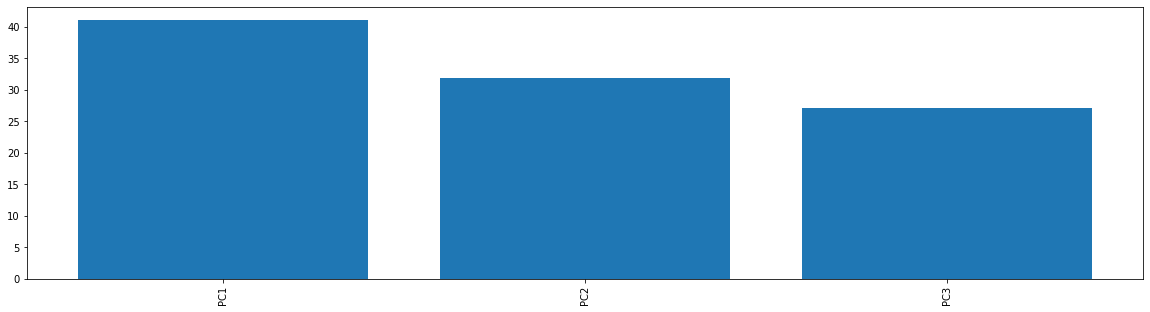

In [8]:
scaled_data = preprocessing.StandardScaler().fit_transform(paras['WRD_EMB'])
pca = PCA(n_components=3)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,5))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.xticks(rotation = 90)
plt.show()

In [9]:
pca.explained_variance_

array([1.24539067, 0.96698187, 0.82023616])

Reading cldf from: //Users/fahimehb/Documents/NPP_GNN_project/dat/cl_df_VISp_annotation.csv


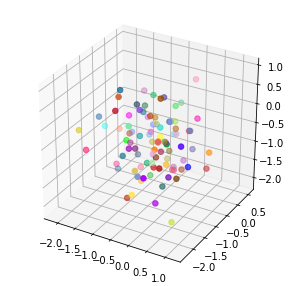

In [10]:
cldf = utils.read_visp_npp_cldf()
cldf.head()
data = analysis.summarize_walk_embedding_results(gensim_dict={"model": paras['WRD_EMB']},
                                                 index = word_to_id.keys(),
                                                 ndim=3, cl_df=cldf)
plot_utils.plot_embedding(data=data, cl_df=cldf, plot_dim=3, plot_size=(5,5))

### One walk with the length of 100000

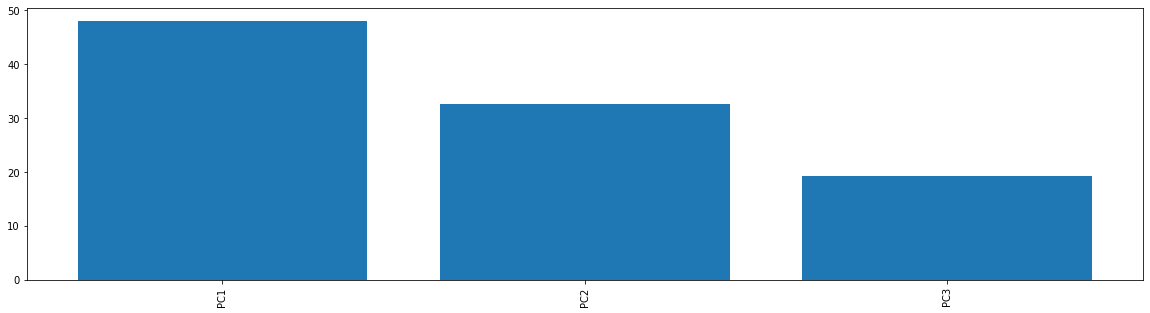

In [5]:
scaled_data = preprocessing.StandardScaler().fit_transform(paras['WRD_EMB'])
pca = PCA(n_components=3)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,5))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.xticks(rotation = 90)
plt.show()

In [6]:
pca.explained_variance_

array([1.45874416, 0.98903529, 0.58482925])

Reading cldf from: //Users/fahimehb/Documents/NPP_GNN_project/dat/cl_df_VISp_annotation.csv


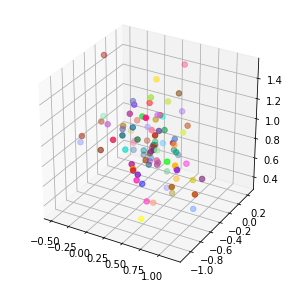

In [7]:
cldf = utils.read_visp_npp_cldf()
cldf.head()
data = analysis.summarize_walk_embedding_results(gensim_dict={"model": paras['WRD_EMB']},
                                                 index = word_to_id.keys(),
                                                 ndim=3, cl_df=cldf)
plot_utils.plot_embedding(data=data, cl_df=cldf, plot_dim=3, plot_size=(5,5))

### 100000 with 5000 epochs

Reading cldf from: //Users/fahimehb/Documents/NPP_GNN_project/dat/cl_df_VISp_annotation.csv


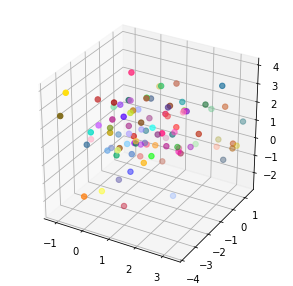

In [30]:
cldf = utils.read_visp_npp_cldf()
plot_utils.plot_embedding(data=data, cl_df=cldf, plot_dim=3, plot_size=(5,5))

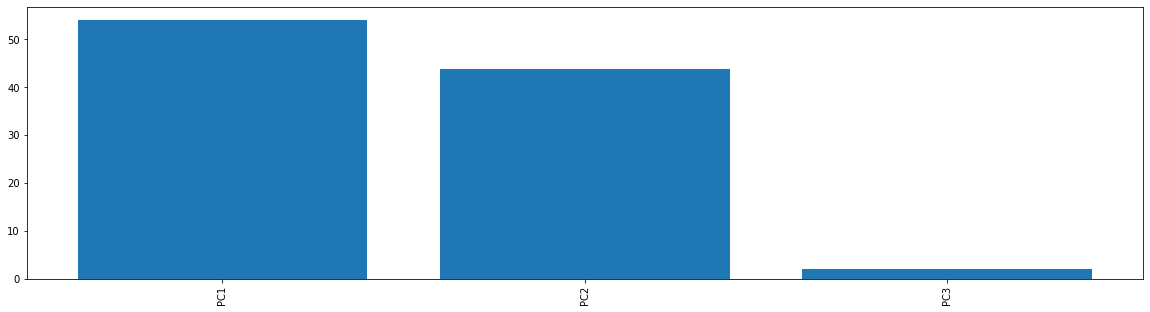

In [31]:
pca = PCA(n_components=3)
pca.fit(data[["Z0", "Z1", "Z2"]])
pca_data = pca.transform(data[["Z0", "Z1", "Z2"]])

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,5))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.xticks(rotation = 90)
plt.show()

In [32]:
pca.explained_variance_

array([2.00049777, 1.61829623, 0.07590677])

### 1000000

In [33]:
from cell import utils, plot_utils
import os 

length = 1000000
p = 1
q = 1
layer = "test_layer"
walk_type = "Undirected_Weighted_node2vec"

model_dir = utils.get_model_dir(
    length= length, 
    p=p, 
    q=q, 
    layer_class=layer, 
    walk_type= walk_type, 
    roi="VISp",
    project_name = "NPP_GNN_project")
model_dir

'//Users/fahimehb/Documents/NPP_GNN_project/models/VISp/test_layer/Undirected_Weighted_node2vec/l_1000000_p_1_q_1'

In [34]:
size=3
iter = 1000
min_count = 0
sg =0 
window = 2

emb_filename = utils.get_emb_filename(size, iter, window, min_count, sg)
emb_filename

'emb_size_3_iter_1000_window_2_mincount_0_sg_0.csv'

In [35]:
data = pd.read_csv(os.path.join(model_dir, emb_filename), index_col="cluster_id")

Reading cldf from: //Users/fahimehb/Documents/NPP_GNN_project/dat/cl_df_VISp_annotation.csv


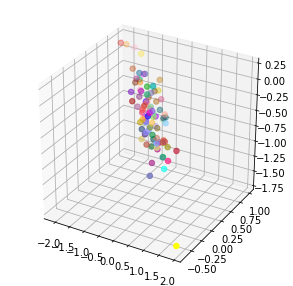

In [36]:
cldf = utils.read_visp_npp_cldf()
plot_utils.plot_embedding(data=data, cl_df=cldf, plot_dim=3, plot_size=(5,5))

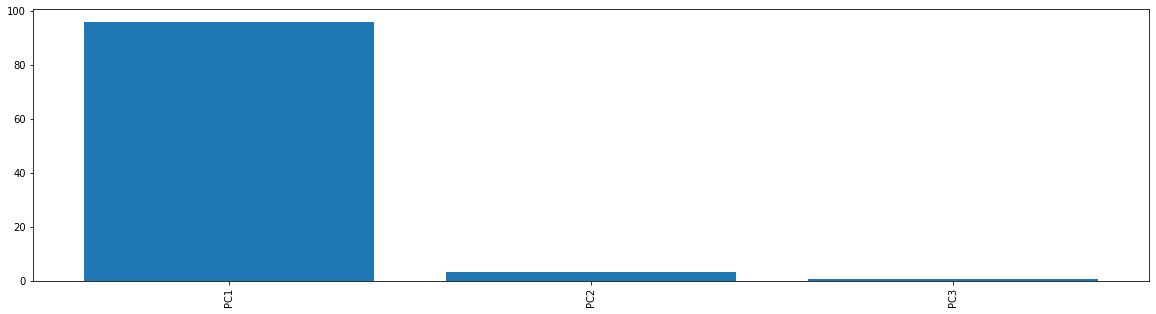

In [37]:
pca = PCA(n_components=3)
pca.fit(data[["Z0", "Z1", "Z2"]])
pca_data = pca.transform(data[["Z0", "Z1", "Z2"]])

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,5))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.xticks(rotation = 90)
plt.show()

In [39]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data[["Z0", "Z1", "Z2"]])
pca_data = analysis.summarize_walk_embedding_results(gensim_dict={"model": principalComponents},
                                                 index = data.index.tolist(),
                                                 ndim=3, 
                                                 cl_df=cldf)

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat